In [8]:
import pickle
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Reds")
from collections import defaultdict
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 50)

In [9]:
# Loading Climate Data from 2_Parsing_Climate_CSV_Files_Into_Features
with open('noaa_csv_final.pickle','rb') as f:
    climate_df = pickle.load(f)

In [10]:
# Raw Feature DataFrame
climate_df.head()

,Unnamed: 0,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DP01,DP01_ATTRIBUTES,DP10,DP10_ATTRIBUTES,DP1X,DP1X_ATTRIBUTES,DSND,DSND_ATTRIBUTES,DSNW,DSNW_ATTRIBUTES,DT00,DT00_ATTRIBUTES,DT32,DT32_ATTRIBUTES,DX32,DX32_ATTRIBUTES,DX70,DX70_ATTRIBUTES,DX90,DX90_ATTRIBUTES,EMNT,EMNT_ATTRIBUTES,EMSD,EMSD_ATTRIBUTES,EMSN,EMSN_ATTRIBUTES,EMXP,EMXP_ATTRIBUTES,EMXT,EMXT_ATTRIBUTES,FZF0,FZF0_ATTRIBUTES,FZF1,FZF1_ATTRIBUTES,FZF2,FZF2_ATTRIBUTES,FZF3,FZF3_ATTRIBUTES,FZF4,FZF4_ATTRIBUTES,FZF5,FZF5_ATTRIBUTES,FZF6,FZF6_ATTRIBUTES,FZF7,FZF7_ATTRIBUTES,FZF8,FZF8_ATTRIBUTES,FZF9,FZF9_ATTRIBUTES,HDSD,HDSD_ATTRIBUTES,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,county,state,WDMV,WDMV_ATTRIBUTES,AWND,AWND_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,MN01,MN01_ATTRIBUTES,MX01,MX01_ATTRIBUTES,PSUN,PSUN_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WDF1,WDF1_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WDFM,WDFM_ATTRIBUTES,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES,HN01,HN01_ATTRIBUTES,HN02,HN02_ATTRIBUTES,HX01,HX01_ATTRIBUTES,HX02,HX02_ATTRIBUTES,LN01,LN01_ATTRIBUTES,LN02,LN02_ATTRIBUTES,LX01,LX01_ATTRIBUTES,LX02,LX02_ATTRIBUTES,MN02,MN02_ATTRIBUTES,MX02,MX02_ATTRIBUTES,HN03,HN03_ATTRIBUTES,HN04,HN04_ATTRIBUTES,HX03,HX03_ATTRIBUTES,HX04,HX04_ATTRIBUTES,LN03,LN03_ATTRIBUTES,LN04,LN04_ATTRIBUTES,LX03,LX03_ATTRIBUTES,LX04,LX04_ATTRIBUTES,MN03,MN03_ATTRIBUTES,MN04,MN04_ATTRIBUTES,MX03,MX03_ATTRIBUTES,MX04,MX04_ATTRIBUTES,HN05,HN05_ATTRIBUTES,HN06,HN06_ATTRIBUTES,HN07,HN07_ATTRIBUTES,HN08,HN08_ATTRIBUTES,HN09,HN09_ATTRIBUTES,HX05,HX05_ATTRIBUTES,HX06,HX06_ATTRIBUTES,HX07,HX07_ATTRIBUTES,HX08,HX08_ATTRIBUTES,LN05,LN05_ATTRIBUTES,LN06,LN06_ATTRIBUTES,LN07,LN07_ATTRIBUTES,LN08,LN08_ATTRIBUTES,LN09,LN09_ATTRIBUTES,LX05,LX05_ATTRIBUTES,LX06,LX06_ATTRIBUTES,LX07,LX07_ATTRIBUTES,LX08,LX08_ATTRIBUTES,MN05,MN05_ATTRIBUTES,MN06,MN06_ATTRIBUTES,MN07,MN07_ATTRIBUTES,MN08,MN08_ATTRIBUTES,MN09,MN09_ATTRIBUTES,MX05,MX05_ATTRIBUTES,MX06,MX06_ATTRIBUTES,MX07,MX07_ATTRIBUTES,MX08,MX08_ATTRIBUTES
0,NaN,USC00264349,2014,39.46880,-119.06440,1270.1,"LAHONTAN DAM, NV US",NaN,NaN,NaN,NaN,14.0,7.0,8.0,7.0,0.0,7.0,NaN,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,",7,0130,",15.7,",7,0721,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.4,",7",38.0,",7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lyon County,Nevada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,USC00264349,2015,39.46880,-119.06440,1270.1,"LAHONTAN DAM, NV US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970.5,NaN,1970.5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lyon County,Nevada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,USC00264349,

## Cleaning Climate Features

### Feature Selection

In [11]:
# Finding unnecessary 'data flag' columns.
# These are used for quality control 
# in the data and not useful for modeling

titles = []
for title in climate_df.columns:
    if 'ATTRIBUTES' in title:
        titles.append(title)
        
# Deleting those columns
climate_df.drop(columns=titles, inplace=True)

climate_df.head()

,Unnamed: 0,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CLDD,DP01,DP10,DP1X,DSND,DSNW,DT00,DT32,DX32,DX70,DX90,EMNT,EMSD,EMSN,EMXP,EMXT,FZF0,FZF1,FZF2,FZF3,FZF4,FZF5,FZF6,FZF7,FZF8,FZF9,HDSD,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,WDFG,WSFG,county,state,WDMV,AWND,EVAP,MN01,MX01,PSUN,TSUN,WDF1,WDF2,WDF5,WDFM,WSF1,WSF2,WSF5,WSFM,HN01,HN02,HX01,HX02,LN01,LN02,LX01,LX02,MN02,MX02,HN03,HN04,HX03,HX04,LN03,LN04,LX03,LX04,MN03,MN04,MX03,MX04,HN05,HN06,HN07,HN08,HN09,HX05,HX06,HX07,HX08,LN05,LN06,LN07,LN08,LN09,LX05,LX06,LX07,LX08,MN05,MN06,MN07,MN08,MN09,MX05,MX06,MX07,MX08
0,NaN,USC00264349,2014,39.46880,-119.06440,1270.1,"LAHONTAN DAM, NV US",NaN,NaN,14.0,8.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.4,38.0,NaN,NaN,NaN,NaN,NaN,Lyon County,Nevada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,USC00264349,2015,39.46880,-119.06440,1270.1,"LAHONTAN DAM, NV US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970.5,1970.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lyon County,Nevada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,USC00264349,2016,39.46880,-119.06440,1270.1,"LAHONTAN DAM, NV US",788.0,788.0,18.0,10.0,0.0,NaN,3.0,0.0,80.0,4.0,189.0,90.0,-15.6,NaN,127.0,22.9,41.7,-4.4,-4.4,-4.4,-6.7,-9.4,0.0,-3.9,-5.0,-6.7,-10.0,NaN,NaN,104.8,232.0,14.22,21.80,6.64,NaN,NaN,Lyon County,Nevada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,USC00264349,2017,39.46880,-119.06440,1270.1,"LAHONTAN DAM, NV US",915.9,915.9,26.0,15.0,1.0,NaN,1.0,1.0,96.0,3.0,192.0,92.0,-17.8,NaN,25.0,37.8,41.1,-1.1,-5.0,-5.0,-7.8,-8.9,-0.6,-2.2,-5.0,-6.7,-13.3,2383.6,2383.6,156.8,25.0,14.13,21.61,6.65,NaN,NaN,Lyon County,Nevada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,USW00003822,2010,32.13133,-81.20237,14.0,"SAVANNAH INTERNATIONAL AIRPORT, GA US",1531.2,1531.2,82.0,55.0,11.0,1.0,0.0,0.0,60.0,0.0,257.0,102.0,-6.7,25.0,23.0,81.5,38.9,0.0,-3.3,-5.0,NaN,NaN,-0.6,-2.2,-6.7,-6.7,NaN,1165.0,1165.0,923.7,23.0,18.90,25.09,12.72,NaN,NaN,Chatham County,Georgia,NaN,2.9,NaN,NaN,NaN,NaN,NaN,NaN,30.0,310.0,NaN,NaN,16.5,23.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Deleting columns with little relevance to model.
# Referenced pdf from NOAA to determine meaning of each column name.
# https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/gsom-gsoy.pdf

climate_df.drop(columns=['Unnamed: 0','HN01', 'HN02', 'HX01', 'HX02', 'LN01', 'LN02', 'LX01', 
                      'LX02','MN02', 'MX02', 'HN03', 'HN04', 'HX03', 'HX04', 'LN03', 'LN04',
                      'LX03', 'LX04', 'MN03', 'MN04', 'MX03', 'MX04', 'HN05', 'HN06','HN07',
                      'HN08', 'HN09', 'HX05', 'HX06', 'HX07', 'HX08', 'LN05', 'LN06', 'LN07',
                      'LN08', 'LN09', 'LX05', 'LX06', 'LX07', 'LX08', 'MN05', 'MN06', 'MN07',
                      'MN08', 'MN09', 'MX05', 'MX06', 'MX07', 'MX08','WDF1', 'WDF2', 'WDF5',
                      'WDFM', 'WSF1', 'WSF2', 'WSF5','MN01', 'MX01','WSFM','CDSD','CLDD',
                      'HDSD','HTDD','WDFG','PSUN','TSUN','EVAP','WSFG', 'WDMV', 'AWND',
                      'EVAP','PSUN','TSUN'], inplace=True)

climate_df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,DP01,DP10,DP1X,DSND,DSNW,DT00,DT32,DX32,DX70,DX90,EMNT,EMSD,EMSN,EMXP,EMXT,FZF0,FZF1,FZF2,FZF3,FZF4,FZF5,FZF6,FZF7,FZF8,FZF9,PRCP,SNOW,TAVG,TMAX,TMIN,county,state
0,USC00264349,2014,39.46880,-119.06440,1270.1,"LAHONTAN DAM, NV US",14.0,8.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.4,38.0,NaN,NaN,NaN,Lyon County,Nevada
1,USC00264349,2015,39.46880,-119.06440,1270.1,"LAHONTAN DAM, NV US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lyon County,Nevada
2,USC00264349,2016,39.46880,-119.06440,1270.1,"LAHONTAN DAM, NV US",18.0,10.0,0.0,NaN,3.0,0.0,80.0,4.0,189.0,90.0,-15.6,NaN,127.0,22.9,41.7,-4.4,-4.4,-4.4,-6.7,-9.4,0.0,-3.9,-5.0,-6.7,-10.0,104.8,232.0,14.22,21.80,6.64,Lyon County,Nevada
3,USC00264349,2017,39.46880,-119.06440,1270.1,"LAHONTAN DAM, NV US",26.0,15.0,1.0,NaN,1.0,1.0,96.0,3.0,192.0,92.0,-17.8,NaN,25.0,37.8,41.1,-1.1,-5.0,-5.0,-7.8,-8.9,-0.6,-2.2,-5.0,-6.7,-13.3,156.8,25.0,14.13,21.61,6.65,Lyon County,Nevada
4,USW00003822,2010,32.13133,-81.20237,14.0,"SAVANNAH INTERNATIONAL AIRPORT, GA US",82.0,55.0,11.0,1.0,0.0,0.0,60.0,0.0,257.0,102.0,-6.7,25.0,23.0,81.5,38.9,0.0,-3.3,-5.0,NaN,NaN,-0.6,-2.2,-6.7,-6.7,NaN,923.7,23.0,18.90,25.09,12.72,Chatham County,Georgia


In [13]:
# Organizing DataFrame by state, county, and year
climate_df = climate_df.groupby(['state','county','DATE']).mean().reset_index()

climate_df.head()

,state,county,DATE,LATITUDE,LONGITUDE,ELEVATION,DP01,DP10,DP1X,DSND,DSNW,DT00,DT32,DX32,DX70,DX90,EMNT,EMSD,EMSN,EMXP,EMXT,FZF0,FZF1,FZF2,FZF3,FZF4,FZF5,FZF6,FZF7,FZF8,FZF9,PRCP,SNOW,TAVG,TMAX,TMIN
0,Alabama,Autauga County,2010,32.482500,-86.485400,100.300000,120.000000,62.000000,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1141.700000,NaN,NaN,NaN,NaN
1,Alabama,Autauga County,2013,32.825200,-86.416400,107.300000,91.000000,74.000000,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1590.100000,NaN,NaN,NaN,NaN
2,Alabama,Autauga County,2014,32.653850,-86.450900,103.800000,106.000000,74.500000,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1342.300000,NaN,NaN,NaN,NaN
3,Alabama,Baldwin County,2010,30.521877,-87.796877,31.723077,111.090909,75.909091,21.0,0.0,0.0,0.0,47.200000,0.0,253.0,95.00,-8.840000,0.0,0.0,91.172727,38.7,-0.66,-2.9,-4.85,-6.7,NaN,-1.200000,-2.720000,-5.08,-9.4,-9.766667,1497.054545,0.0,18.848,24.8460,12.854000
4,Alabama,Baldwin County,2011,30.516725,-87.801650,29.991667,95.300000,64.500000,14.1,NaN,NaN,0.0,21.666667,0.0,280.0,97.25,-5.933333,NaN,NaN,95.080000,38.6,-1.40,-2.5,NaN,NaN,NaN,-2.033333,-2.766667,-4.60,-6.7,NaN,1218.360000,NaN,20.060,26.0475,14.013333


In [14]:
# Relabeling columns for easier understanding
climate_df.rename(columns={'DP01':'precip_num_days_over_0.01', 'DP10':'precip_num_days_over_0.1',
                           'DP1X':'precip_num_days_over_1', 'DSND':'snow_depth_num_days_over_1', 
                           'DSNW':'snowfall_num_days_over_1', 'DT00':'max_temp_num_days_under_0',
                           'DT32':'min_temp_num_days_under_32', 'DX32':'max_temp_num_days_under_32',
                           'DX70':'max_temp_num_days_over_70', 'DX90':'max_temp_num_days_over_90',
                           'EMNT':'min_temp_year','EMSD':'max_snow_depth_year', 'EMSN':'max_snowfall_year',
                           'EMXP':'max_precip_day', 'EMXT':'max_temp_year', 'FZF0':'first_min_temp_under_32',
                           'FZF1':'first_min_temp_under_28', 'FZF2':'first_min_temp_under_24', 
                           'FZF3':'first_min_temp_under_20', 'FZF4':'first_min_temp_under_16', 
                           'FZF5':'last_min_temp_under_32', 'FZF6':'last_min_temp_under_28', 
                           'FZF7':'last_min_temp_under_24', 'FZF8':'last_min_temp_under_20',
                           'FZF9':'last_min_temp_under_16', 'PRCP':'total_precip_year', 
                           'SNOW':'total_snowfall_year', 'TAVG':'avg_daily_temp_year', 
                           'TMAX':'avg_daily_max_temp', 'TMIN':'avg_daily_min_temp', 'DATE':'year'},inplace=True)

climate_df.head()

,state,county,year,LATITUDE,LONGITUDE,ELEVATION,precip_num_days_over_0.01,precip_num_days_over_0.1,precip_num_days_over_1,snow_depth_num_days_over_1,snowfall_num_days_over_1,max_temp_num_days_under_0,min_temp_num_days_under_32,max_temp_num_days_under_32,max_temp_num_days_over_70,max_temp_num_days_over_90,min_temp_year,max_snow_depth_year,max_snowfall_year,max_precip_day,max_temp_year,first_min_temp_under_32,first_min_temp_under_28,first_min_temp_under_24,first_min_temp_under_20,first_min_temp_under_16,last_min_temp_under_32,last_min_temp_under_28,last_min_temp_under_24,last_min_temp_under_20,last_min_temp_under_16,total_precip_year,total_snowfall_year,avg_daily_temp_year,avg_daily_max_temp,avg_daily_min_temp
0,Alabama,Autauga County,2010,32.482500,-86.485400,100.300000,120.000000,62.000000,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1141.700000,NaN,NaN,NaN,NaN
1,Alabama,Autauga County,2013,32.825200,-86.416400,107.300000,91.000000,74.000000,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1590.100000,NaN,NaN,NaN,NaN
2,Alabama,Autauga County,2014,32.653850,-86.450900,103.800000,106.000000,74.500000,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1342.300000,NaN,NaN,NaN,NaN
3,Alabama,Baldwin County,2010,30.521877,-87.796877,31.723077,111.090909,75.909091,21.0,0.0,0.0,0.0,47.200000,0.0,253.0,95.00,-8.840000,0.0,0.0,91.172727,38.7,-0.66,-2.9,-4.85,-6.7,NaN,-1.200000,-2.720000,-5.08,-9.4,-9.766667,1497.054545,0.0,18.848,24.8460,12.854000
4,Alabama,Baldwin County,2011,30.516725,-87.801650,29.991667,95.300000,64.500000,14.1,NaN,NaN,0.0,21.666667,0.0,280.0,97.25,-5.933333,NaN,NaN,95.080000,38.6,-1.40,-2.5,NaN,NaN,NaN,-2.033333,-2.766667,-4.60,-6.7,NaN,1218.360000,NaN,20.060,26.0475,14.013333


### Imputing Null Values

In [15]:
# Percentage of null values in each column BEFORE imputing
null_percent_before_imputing = (climate_df.isnull().sum()/len(climate_df)*100)
print(null_percent_before_imputing)

state                          0.000000
county                         0.000000
year                           0.000000
LATITUDE                       0.000000
LONGITUDE                      0.000000
ELEVATION                      0.022499
precip_num_days_over_0.01      4.567340
precip_num_days_over_0.1       4.567340
precip_num_days_over_1         4.571840
snow_depth_num_days_over_1    42.631508
snowfall_num_days_over_1      40.615578
max_temp_num_days_under_0     17.436890
min_temp_num_days_under_32    17.436890
max_temp_num_days_under_32    16.766413
max_temp_num_days_over_70     16.766413
max_temp_num_days_over_90     16.766413
min_temp_year                 17.436890
max_snow_depth_year           42.631508
max_snowfall_year             40.615578
max_precip_day                 4.567340
max_temp_year                 16.766413
first_min_temp_under_32       19.047833
first_min_temp_under_28       21.270756
first_min_temp_under_24       26.432075
first_min_temp_under_20       33.690321


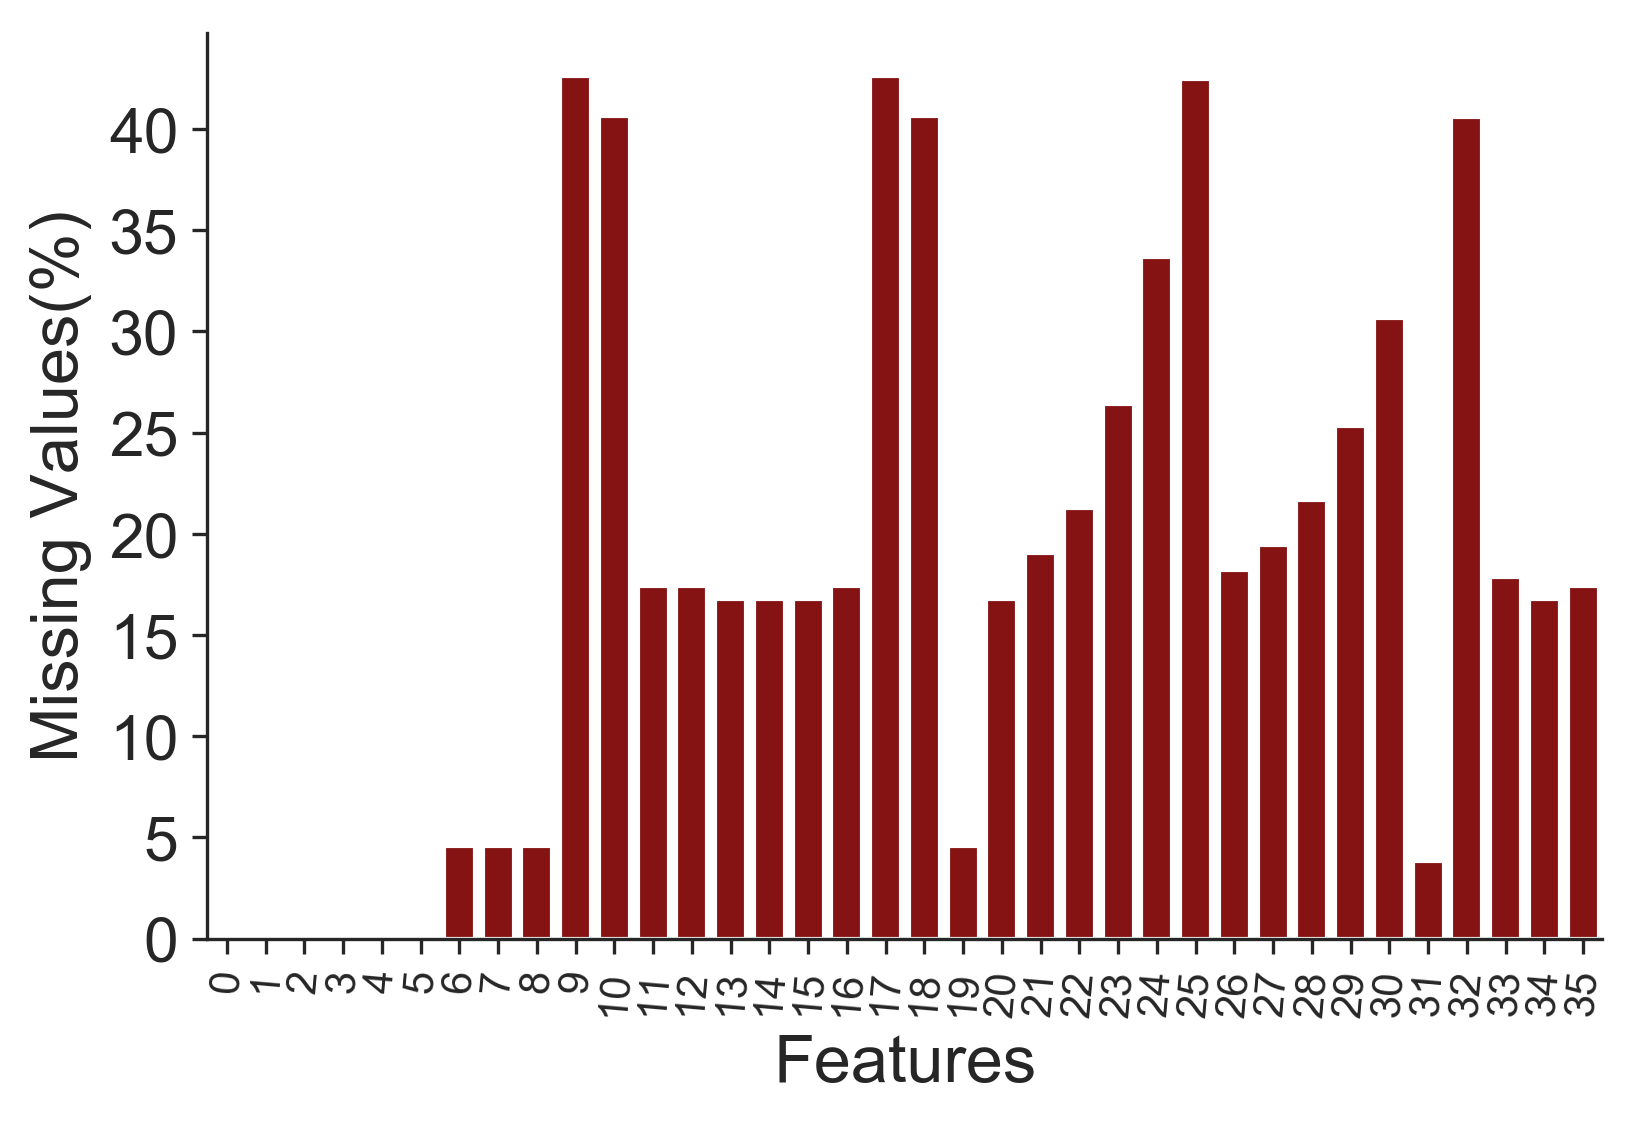

In [16]:
# Plotting missing columns in each column/feature
sns.set_style("ticks")
plt.figure(dpi=300)

sns.barplot([x for x in range(len(climate_df.columns.values))],null_percent_before_imputing.values,color='#990000ff')

plt.xlabel('Features', fontsize=16)
plt.ylabel('Missing Values(%)', fontsize=16)
plt.yticks(size=15)

sns.despine()
# plt.tick_params(axis='both', which='major', labelsize=16);
plt.xticks(rotation=85);

In [17]:
# Columns with nan values
nan_columns =['ELEVATION','precip_num_days_over_0.01', 'precip_num_days_over_0.1',
              'precip_num_days_over_1', 'snow_depth_num_days_over_1',
              'snowfall_num_days_over_1', 'max_temp_num_days_under_0',
              'min_temp_num_days_under_32', 'max_temp_num_days_under_32',
              'max_temp_num_days_over_70', 'max_temp_num_days_over_90','min_temp_year', 
              'max_snow_depth_year', 'max_snowfall_year','max_precip_day', 'max_temp_year', 
              'first_min_temp_under_32','first_min_temp_under_28', 'first_min_temp_under_24',
              'first_min_temp_under_20','first_min_temp_under_16','last_min_temp_under_32', 
              'last_min_temp_under_28','last_min_temp_under_24', 'last_min_temp_under_20',
              'last_min_temp_under_16','total_precip_year','total_snowfall_year', 
              'avg_daily_temp_year','avg_daily_max_temp','avg_daily_min_temp']

In [18]:
# Dataframe to visualize the means of each column per state
state_climate_df = climate_df.groupby('state').mean()
state_climate_df.head()

,year,LATITUDE,LONGITUDE,ELEVATION,precip_num_days_over_0.01,precip_num_days_over_0.1,precip_num_days_over_1,snow_depth_num_days_over_1,snowfall_num_days_over_1,max_temp_num_days_under_0,min_temp_num_days_under_32,max_temp_num_days_under_32,max_temp_num_days_over_70,max_temp_num_days_over_90,min_temp_year,max_snow_depth_year,max_snowfall_year,max_precip_day,max_temp_year,first_min_temp_under_32,first_min_temp_under_28,first_min_temp_under_24,first_min_temp_under_20,first_min_temp_under_16,last_min_temp_under_32,last_min_temp_under_28,last_min_temp_under_24,last_min_temp_under_20,last_min_temp_under_16,total_precip_year,total_snowfall_year,avg_daily_temp_year,avg_daily_max_temp,avg_daily_min_temp
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,2013.352688,32.935625,-86.708194,147.120703,106.804950,75.754375,17.625138,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,97.308386,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1422.981432,35.057440,17.552706,23.943332,11.181082
Alaska,2013.473988,60.403290,-148.132709,195.689068,160.025573,103.616091,11.464987,140.035247,21.026324,38.457042,173.361962,89.719390,18.785493,0.096023,-25.458539,724.444106,195.020055,52.099598,26.016904,-0.693070,-3.125500,-5.518089,-7.847979,-10.131905,-0.769659,-3.270877,-5.889116,-8.588786,-11.151575,1291.387516,1800.140832,1.937613,5.750627,-1.831495
Arizona,2013.500000,33.600573,-111.413475,1248.987377,48.245330,30.208149,2.294552,20.064678,2.683139,0.578892,67.255558,2.872503,230.678837,88.789692,-9.744479,146.553448,67.635457,39.003311,40.057809,-1.198202,-3.354419,-5.590492,-7.879271,-10.150722,-0.895622,-3.138641,-5.571046,-7.827317,-10.210301,318.654373,271.138901,16.698043,24.273887,9.119801
Arkansas,2013.493805,34.949443,-92.449520,150.430692,95.102416,67.788477,15.934377,3.562928,1.631871,0.102994,67.749351,6.080235,217.570192,68.937144,-12.134567,66.795639,68.596491,95.767142,38.567308,-1.205043,-3.245593,-5.448762,-7.776340,-9.905908,-1.259152,-3.875368,-6.271529,-8.620114,-10.774829,1282.386805,125.155556,16.349129,22.432967,10.285019
California,2013.497758,37.816471,-120.791788,589.744270,63.221610,40.942868,6.985717,24.855390,4.235650,0.306176,46.112062,2.512993,184.323062,54.336917,-5.288083,258.681341,76.279684,56.291993,38.562779,-0.707442,-2.962294,-5.285510,-7.554330,-9.990281,-0.600359,-2.903298,-5.278439,-7.562275,-9.999975,645.345740,488.337476,14.886016,21.454567,8.322165


In [19]:
# This code imputes nulls with means corresponding to the state in that row.
# Since there are many counties that are missing data, an assumption was made
# that the average state values for that column would be a reasonable 
# approximation to the actual county value.

for column in nan_columns:
    climate_df.loc[:,column] = climate_df.groupby('state')[column].transform(lambda x: x.fillna(x.mean()))
    
climate_df.head()

,state,county,year,LATITUDE,LONGITUDE,ELEVATION,precip_num_days_over_0.01,precip_num_days_over_0.1,precip_num_days_over_1,snow_depth_num_days_over_1,snowfall_num_days_over_1,max_temp_num_days_under_0,min_temp_num_days_under_32,max_temp_num_days_under_32,max_temp_num_days_over_70,max_temp_num_days_over_90,min_temp_year,max_snow_depth_year,max_snowfall_year,max_precip_day,max_temp_year,first_min_temp_under_32,first_min_temp_under_28,first_min_temp_under_24,first_min_temp_under_20,first_min_temp_under_16,last_min_temp_under_32,last_min_temp_under_28,last_min_temp_under_24,last_min_temp_under_20,last_min_temp_under_16,total_precip_year,total_snowfall_year,avg_daily_temp_year,avg_daily_max_temp,avg_daily_min_temp
0,Alabama,Autauga County,2010,32.482500,-86.485400,100.300000,120.000000,62.000000,14.0,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,102.100000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1141.700000,35.05744,17.552706,23.943332,11.181082
1,Alabama,Autauga County,2013,32.825200,-86.416400,107.300000,91.000000,74.000000,20.0,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,84.800000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1590.100000,35.05744,17.552706,23.943332,11.181082
2,Alabama,Autauga County,2014,32.653850,-86.450900,103.800000,106.000000,74.500000,16.5,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,96.500000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1342.300000,35.05744,17.552706,23.943332,11.181082
3,Alabama,Baldwin County,2010,30.521877,-87.796877,31.723077,111.090909,75.909091,21.0,0.000000,0.000000,0.000000,47.200000,0.000000,253.000000,95.000000,-8.840000,0.000000,0.000000,91.172727,38.700000,-0.660000,-2.900000,-4.850000,-6.700000,-9.526784,-1.200000,-2.720000,-5.080000,-9.400000,-9.766667,1497.054545,0.00000,18.848000,24.846000,12.854000
4,Alabama,Baldwin County,2011,30.516725,-87.801650,29.991667,95.300000,64.500000,14.1,0.673203,0.476935,0.000000,21.666667,0.000000,280.000000,97.250000,-5.933333,22.512255,25.230208,95.080000,38.600000,-1.400000,-2.500000,-5.256631,-7.443868,-9.526784,-2.033333,-2.766667,-4.600000,-6.700000,-10.532082,1218.360000,35.05744,20.060000,26.047500,14.013333


In [20]:
# Percentage of null values in each column AFTER imputing
null_percent_after_imputing = (climate_df.isnull().sum()/len(climate_df)*100)
print(null_percent_after_imputing)

state                         0.000000
county                        0.000000
year                          0.000000
LATITUDE                      0.000000
LONGITUDE                     0.000000
ELEVATION                     0.000000
precip_num_days_over_0.01     0.000000
precip_num_days_over_0.1      0.000000
precip_num_days_over_1        0.000000
snow_depth_num_days_over_1    0.004500
snowfall_num_days_over_1      0.004500
max_temp_num_days_under_0     0.004500
min_temp_num_days_under_32    0.004500
max_temp_num_days_under_32    0.004500
max_temp_num_days_over_70     0.004500
max_temp_num_days_over_90     0.004500
min_temp_year                 0.004500
max_snow_depth_year           0.004500
max_snowfall_year             0.004500
max_precip_day                0.000000
max_temp_year                 0.004500
first_min_temp_under_32       0.004500
first_min_temp_under_28       0.004500
first_min_temp_under_24       0.148495
first_min_temp_under_20       0.148495
first_min_temp_under_16  

In [21]:
# Hawaii and Washington D.C. are the null values 
# that didn't get filled. This is because neither 
# have state means for those columns due to 
# missing values.

climate_df[pd.isnull(climate_df.first_min_temp_under_24)]

,state,county,year,LATITUDE,LONGITUDE,ELEVATION,precip_num_days_over_0.01,precip_num_days_over_0.1,precip_num_days_over_1,snow_depth_num_days_over_1,snowfall_num_days_over_1,max_temp_num_days_under_0,min_temp_num_days_under_32,max_temp_num_days_under_32,max_temp_num_days_over_70,max_temp_num_days_over_90,min_temp_year,max_snow_depth_year,max_snowfall_year,max_precip_day,max_temp_year,first_min_temp_under_32,first_min_temp_under_28,first_min_temp_under_24,first_min_temp_under_20,first_min_temp_under_16,last_min_temp_under_32,last_min_temp_under_28,last_min_temp_under_24,last_min_temp_under_20,last_min_temp_under_16,total_precip_year,total_snowfall_year,avg_daily_temp_year,avg_daily_max_temp,avg_daily_min_temp
3681,Hawaii,Hawaii County,2010,19.676422,-155.531027,567.798387,142.040000,86.760000,9.880000,0.0,0.0,0.0,1.600000,0.0,273.400000,0.000000,6.700000,0.0,0.0,83.268000,27.613333,-0.200,-2.5,NaN,NaN,NaN,-0.366667,-3.76,-4.95,NaN,NaN,1214.777419,0.0,17.515333,22.722667,12.308000
3682,Hawaii,Hawaii County,2011,19.691117,-155.557180,635.691304,166.769231,107.807692,18.923077,0.0,0.0,0.0,2.500000,0.0,265.214286,0.500000,7.557143,0.0,0.0,97.119231,28.100000,-0.200,-2.5,NaN,NaN,NaN,-0.350000,-4.60,-4.60,NaN,NaN,1664.597436,0.0,17.970714,22.776429,13.163571
3683,Hawaii,Hawaii County,2012,19.621016,-155.556856,600.505882,167.095238,105.666667,12.095238,0.0,0.0,0.0,2.076923,0.0,273.583333,1.166667,8.615385,0.0,0.0,68.471429,28.600000,-0.100,-2.5,NaN,NaN,NaN,-0.800000,-2.20,-4.95,NaN,NaN,1219.614286,0.0,18.487500,23.117500,13.576154
3684,Hawaii,Hawaii County,2013,19.620053,-155.521678,603.343243,154.409091,89.590909,12.818182,0.0,0.0,0.0,4.500000,0.0,257.300000,0.100000,6.810000,0.0,0.0,131.459091,28.240000,-0.300,-2.5,NaN,NaN,NaN,-0.550000,-2.90,-4.95,NaN,NaN,1432.406250,0.0,17.539000,22.409000,12.668000
3685,Hawaii,Hawaii County,2014,19.652989,-155.500097,667.945000,182.958333,116.250000,23.250000,0.0,0.0,0.0,2.615385,0.0,268.384615,3.692308,7.692308,0.0,0.0,135.604167,29.100000,-0.600,-2.5,NaN,NaN,NaN,-0.300000,-5.30,-5.30,NaN,NaN,2236.933333,0.0,18.900000,23.614615,14.183846
3686,Hawaii,Hawaii County,2015,19.657280,-155.522751,707.067442,182.275862,120.827586,30.310345,0.0,0.0,0.0,1.285714,0.0,273.357143,9.285714,7.521429,0.0,0.0,130.906897,29.757143,0.000,-2.5,NaN,NaN,NaN,-0.350000,-3.76,-4.95,NaN,NaN,2516.155556,0.0,19.121429,23.880000,14.363571
3687,Hawaii,Hawaii County,2016,19.612107,-155.483997,753.673684,204.576923,129.692308,24.923077,0.0,0.0,0.0,0.416667,0.0,254.750000,2.500000,7.241667,0.0,0.0,135.203846,29.150000,-0.400,-2.5,NaN,NaN,NaN,-0.500000,-3.76,-4.95,NaN,NaN,2317.762069,0.0,18.106667,23.148333,13.060833
3688,Hawaii,Hawaii County,2017,19.635052,-155.458100,590.468750,183.913043,107.304348,18.695652,0.0,0.0,0.0,3.125000,0.0,297.625000,1.125000,9.037500,0.0,0.0,127.391304,29.925000,-0.400,-2.5,NaN,NaN,NaN,-0.300000,-3.80,-4.95,NaN,NaN,1804.585714,0.0,19.461250,24.105000,14.818750
3689,Hawaii,Honolulu County,2010,21.424791,-157.922619,110.343478,166.851852,76.518519,8.814815,0.0,0.0,0.0,0.000000,0.0,360.222222,1.111111,14.500000,0.0,0.0,118.244444,31.366667,-0.275,-2.5,NaN,NaN,NaN,-0.439583,-3.76,-4.95,NaN,NaN,1166.277143,0.0,24.030000,27.806667,20.254444
3690,Hawaii,Honolulu County,2011,21.406114,-157.931090,113.248485,180.818182,81.590909,10.045455,0.0,0.0,0.0,0.000000,0.0,358.727273,1.181818,14.681818,0.0,0.0,98.095455,31.009091,-0.275,-2.5,NaN,NaN,NaN,-0.439583,-3.76,-4.95,NaN,NaN,1224.807143,0.0,24.254545,27.515455,20.990909


In [22]:
# Dropping Hawaii and Washington, D.C. due to missing values.
# Also, Hawaii has no incidence of Lyme Disease so there is 
# no issue removing it and Washington D.C. is significantly 
# smaller than any state so it will have no affect on modeling.

# Also, saving cleaned climate DataFrame as 'features' in 
# preparation for merging with target DataFrame

features = climate_df[(climate_df.state != 'Hawaii') & (climate_df.state != 'Washington, D.C.')]

In [23]:
# Percentage of null values in each column - NONE!
features.isnull().sum()/len(features)*100

state                         0.0
county                        0.0
year                          0.0
LATITUDE                      0.0
LONGITUDE                     0.0
ELEVATION                     0.0
precip_num_days_over_0.01     0.0
precip_num_days_over_0.1      0.0
precip_num_days_over_1        0.0
snow_depth_num_days_over_1    0.0
snowfall_num_days_over_1      0.0
max_temp_num_days_under_0     0.0
min_temp_num_days_under_32    0.0
max_temp_num_days_under_32    0.0
max_temp_num_days_over_70     0.0
max_temp_num_days_over_90     0.0
min_temp_year                 0.0
max_snow_depth_year           0.0
max_snowfall_year             0.0
max_precip_day                0.0
max_temp_year                 0.0
first_min_temp_under_32       0.0
first_min_temp_under_28       0.0
first_min_temp_under_24       0.0
first_min_temp_under_20       0.0
first_min_temp_under_16       0.0
last_min_temp_under_32        0.0
last_min_temp_under_28        0.0
last_min_temp_under_24        0.0
last_min_temp_

### Adding Column for Year Offset

In [24]:
# Adding a column of the next year for merging
# This is because we need to use the previous year's 
# data to predict that year and thus, the one year offset.

features['next_year'] = features['year'] + 1
features.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,state,county,year,LATITUDE,LONGITUDE,ELEVATION,precip_num_days_over_0.01,precip_num_days_over_0.1,precip_num_days_over_1,snow_depth_num_days_over_1,snowfall_num_days_over_1,max_temp_num_days_under_0,min_temp_num_days_under_32,max_temp_num_days_under_32,max_temp_num_days_over_70,max_temp_num_days_over_90,min_temp_year,max_snow_depth_year,max_snowfall_year,max_precip_day,max_temp_year,first_min_temp_under_32,first_min_temp_under_28,first_min_temp_under_24,first_min_temp_under_20,first_min_temp_under_16,last_min_temp_under_32,last_min_temp_under_28,last_min_temp_under_24,last_min_temp_under_20,last_min_temp_under_16,total_precip_year,total_snowfall_year,avg_daily_temp_year,avg_daily_max_temp,avg_daily_min_temp,next_year
0,Alabama,Autauga County,2010,32.482500,-86.485400,100.300000,120.000000,62.000000,14.0,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,102.100000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1141.700000,35.05744,17.552706,23.943332,11.181082,2011
1,Alabama,Autauga County,2013,32.825200,-86.416400,107.300000,91.000000,74.000000,20.0,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,84.800000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1590.100000,35.05744,17.552706,23.943332,11.181082,2014
2,Alabama,Autauga County,2014,32.653850,-86.450900,103.800000,106.000000,74.500000,16.5,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,96.500000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1342.300000,35.05744,17.552706,23.943332,11.181082,2015
3,Alabama,Baldwin County,2010,30.521877,-87.796877,31.723077,111.090909,75.909091,21.0,0.000000,0.000000,0.000000,47.200000,0.000000,253.000000,95.000000,-8.840000,0.000000,0.000000,91.172727,38.700000,-0.660000,-2.900000,-4.850000,-6.700000,-9.526784,-1.200000,-2.720000,-5.080000,-9.400000,-9.766667,1497.054545,0.00000,18.848000,24.846000,12.854000,2011
4,Alabama,Baldwin County,2011,30.516725,-87.801650,29.991667,95.300000,64.500000,14.1,0.673203,0.476935,0.000000,21.666667,0.000000,280.000000,97.250000,-5.933333,22.512255,25.230208,95.080000,38.600000,-1.400000,-2.500000,-5.256631,-7.443868,-9.526784,-2.033333,-2.766667,-4.600000,-6.700000,-10.532082,1218.360000,35.05744,20.060000,26.047500,14.013333,2012


In [25]:
# Pickling cleaned features DataFrame
redo_pickle = False

if redo_pickle:
    with open('feature_variables.pickle','wb') as f:
        pickle.dump(features,f)
if not redo_pickle:
    with open('feature_variables.pickle','rb') as f:
        features = pickle.load(f)

## Merging Features with Target

In [18]:
# Loading Target DataFrame from 1_Creating_Target_Variable.ipynb
with open('target_variable.pickle','rb') as f:
    target = pickle.load(f)

In [19]:
# Merging Features DataFrame with Target DataFrame
complete_df = features.merge(target, left_on=['state','county','DATE'],right_on=['STNAME','CTYNAME','year'])
complete_df.head()

,state,county,DATE,LATITUDE,LONGITUDE,ELEVATION,precip_num_days_over_0.01,precip_num_days_over_0.1,precip_num_days_over_1,snow_depth_num_days_over_1,snowfall_num_days_over_1,max_temp_num_days_under_0,min_temp_num_days_under_32,max_temp_num_days_under_32,max_temp_num_days_over_70,max_temp_num_days_over_90,min_temp_year,max_snow_depth_year,max_snowfall_year,max_precip_day,max_temp_year,first_min_temp_under_32,first_min_temp_under_28,first_min_temp_under_24,first_min_temp_under_20,first_min_temp_under_16,last_min_temp_under_32,last_min_temp_under_28,last_min_temp_under_24,last_min_temp_under_20,last_min_temp_under_16,total_precip_year,total_snowfall_year,avg_daily_temp_year,avg_daily_max_temp,avg_daily_min_temp,STNAME,CTYNAME,year,incidence_rate,high_incidence
0,Alabama,Autauga County,2010,32.482500,-86.485400,100.300000,120.000000,62.000000,14.0,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,102.100000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1141.700000,35.05744,17.552706,23.943332,11.181082,Alabama,Autauga County,2010,0.000000,0
1,Alabama,Autauga County,2013,32.825200,-86.416400,107.300000,91.000000,74.000000,20.0,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,84.800000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1590.100000,35.05744,17.552706,23.943332,11.181082,Alabama,Autauga County,2013,0.000000,0
2,Alabama,Autauga County,2014,32.653850,-86.450900,103.800000,106.000000,74.500000,16.5,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,96.500000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1342.300000,35.05744,17.552706,23.943332,11.181082,Alabama,Autauga County,2014,0.000000,0
3,Alabama,Baldwin County,2010,30.521877,-87.796877,31.723077,111.090909,75.909091,21.0,0.000000,0.000000,0.000000,47.200000,0.000000,253.000000,95.000000,-8.840000,0.000000,0.000000,91.172727,38.700000,-0.660000,-2.900000,-4.850000,-6.700000,-9.526784,-1.200000,-2.720000,-5.080000,-9.400000,-9.766667,1497.054545,0.00000,18.848000,24.846000,12.854000,Alabama,Baldwin County,2010,0.000000,0
4,Alabama,Baldwin County,2011,30.516725,-87.801650,29.991667,95.300000,64.500000,14.1,0.673203,0.476935,0.000000,21.666667,0.000000,280.000000,97.250000,-5.933333,22.512255,25.230208,95.080000,38.600000,-1.400000,-2.500000,-5.256631,-7.443868,-9.526784,-2.033333,-2.766667,-4.600000,-6.700000,-10.532082,1218.360000,35.05744,20.060000,26.047500,14.013333,Alabama,Baldwin County,2011,0.000005,0


In [20]:
# Dropping unnecessary/redundant columns
complete_df.drop(columns=['LATITUDE','LONGITUDE','STNAME','CTYNAME','year'], inplace=True)
complete_df.head()

,state,county,DATE,ELEVATION,precip_num_days_over_0.01,precip_num_days_over_0.1,precip_num_days_over_1,snow_depth_num_days_over_1,snowfall_num_days_over_1,max_temp_num_days_under_0,min_temp_num_days_under_32,max_temp_num_days_under_32,max_temp_num_days_over_70,max_temp_num_days_over_90,min_temp_year,max_snow_depth_year,max_snowfall_year,max_precip_day,max_temp_year,first_min_temp_under_32,first_min_temp_under_28,first_min_temp_under_24,first_min_temp_under_20,first_min_temp_under_16,last_min_temp_under_32,last_min_temp_under_28,last_min_temp_under_24,last_min_temp_under_20,last_min_temp_under_16,total_precip_year,total_snowfall_year,avg_daily_temp_year,avg_daily_max_temp,avg_daily_min_temp,incidence_rate,high_incidence
0,Alabama,Autauga County,2010,100.300000,120.000000,62.000000,14.0,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,102.100000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1141.700000,35.05744,17.552706,23.943332,11.181082,0.000000,0
1,Alabama,Autauga County,2013,107.300000,91.000000,74.000000,20.0,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,84.800000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1590.100000,35.05744,17.552706,23.943332,11.181082,0.000000,0
2,Alabama,Autauga County,2014,103.800000,106.000000,74.500000,16.5,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,96.500000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1342.300000,35.05744,17.552706,23.943332,11.181082,0.000000,0
3,Alabama,Baldwin County,2010,31.723077,111.090909,75.909091,21.0,0.000000,0.000000,0.000000,47.200000,0.000000,253.000000,95.000000,-8.840000,0.000000,0.000000,91.172727,38.700000,-0.660000,-2.900000,-4.850000,-6.700000,-9.526784,-1.200000,-2.720000,-5.080000,-9.400000,-9.766667,1497.054545,0.00000,18.848000,24.846000,12.854000,0.000000,0
4,Alabama,Baldwin County,2011,29.991667,95.300000,64.500000,14.1,0.673203,0.476935,0.000000,21.666667,0.000000,280.000000,97.250000,-5.933333,22.512255,25.230208,95.080000,38.600000,-1.400000,-2.500000,-5.256631,-7.443868,-9.526784,-2.033333,-2.766667,-4.600000,-6.700000,-10.532082,1218.360000,35.05744,20.060000,26.047500,14.013333,0.000005,0


In [21]:
# Saving csv of merged data for public Tableau dashboard
save_csv = False
if save_csv:
    complete_df.to_csv('tableau_df.csv',index=False)

## Extra Cleaning for Modeling

In [22]:
# Dropping location columns because it would add alot of unnecessary complexity to the model. 
# There are 50 states and 3,142 counties which would be way too many dummy variables.
# Also, each county has its own unique climate so location differences are already accounted for.

# Dropping DATE column because I am not doing time series modeling.

# Dropping incidence_rate because it is the unbinned version of the 
# target variable and would lead to data leakage.

complete_df.drop(columns=['state','county','DATE','incidence_rate'], inplace=True)
complete_df.head()

,ELEVATION,precip_num_days_over_0.01,precip_num_days_over_0.1,precip_num_days_over_1,snow_depth_num_days_over_1,snowfall_num_days_over_1,max_temp_num_days_under_0,min_temp_num_days_under_32,max_temp_num_days_under_32,max_temp_num_days_over_70,max_temp_num_days_over_90,min_temp_year,max_snow_depth_year,max_snowfall_year,max_precip_day,max_temp_year,first_min_temp_under_32,first_min_temp_under_28,first_min_temp_under_24,first_min_temp_under_20,first_min_temp_under_16,last_min_temp_under_32,last_min_temp_under_28,last_min_temp_under_24,last_min_temp_under_20,last_min_temp_under_16,total_precip_year,total_snowfall_year,avg_daily_temp_year,avg_daily_max_temp,avg_daily_min_temp,high_incidence
0,100.300000,120.000000,62.000000,14.0,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,102.100000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1141.700000,35.05744,17.552706,23.943332,11.181082,0
1,107.300000,91.000000,74.000000,20.0,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,84.800000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1590.100000,35.05744,17.552706,23.943332,11.181082,0
2,103.800000,106.000000,74.500000,16.5,0.673203,0.476935,0.015794,52.925390,1.673243,242.547207,68.697973,-9.781671,22.512255,25.230208,96.500000,36.947149,-0.971309,-3.093829,-5.256631,-7.443868,-9.526784,-1.460569,-3.589605,-5.620019,-8.046689,-10.532082,1342.300000,35.05744,17.552706,23.943332,11.181082,0
3,31.723077,111.090909,75.909091,21.0,0.000000,0.000000,0.000000,47.200000,0.000000,253.000000,95.000000,-8.840000,0.000000,0.000000,91.172727,38.700000,-0.660000,-2.900000,-4.850000,-6.700000,-9.526784,-1.200000,-2.720000,-5.080000,-9.400000,-9.766667,1497.054545,0.00000,18.848000,24.846000,12.854000,0
4,29.991667,95.300000,64.500000,14.1,0.673203,0.476935,0.000000,21.666667,0.000000,280.000000,97.250000,-5.933333,22.512255,25.230208,95.080000,38.600000,-1.400000,-2.500000,-5.256631,-7.443868,-9.526784,-2.033333,-2.766667,-4.600000,-6.700000,-10.532082,1218.360000,35.05744,20.060000,26.047500,14.013333,0


In [23]:
# Pickling final version of DataFrame for modeling
save_pickle = False

if save_pickle:
    with open('final_df.pickle','wb') as f:
        pickle.dump(complete_df,f)